In [1]:
import dlib
from skimage import io
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import re
from PIL import Image
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get_frontal_face_detector

In [2]:
detector = dlib.get_frontal_face_detector()

In [3]:
imagepath = '../YoonsKitchen/category_AI/8'
front_detected=[]

In [4]:
len(os.listdir(imagepath))

9

None


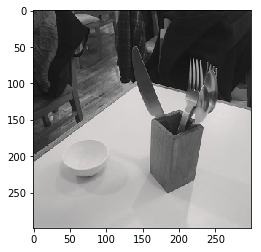

None


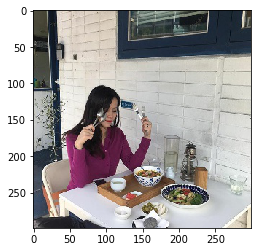

None


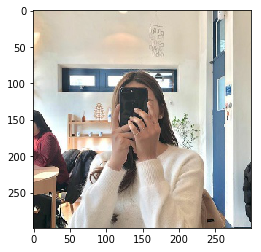

None


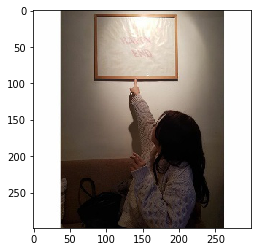

None


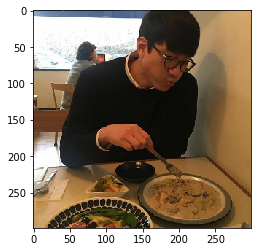

left,top,right,bottom: 42 65 146 169
left,top,right,bottom: 213 77 285 149


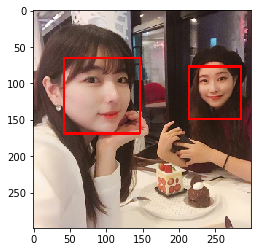

None


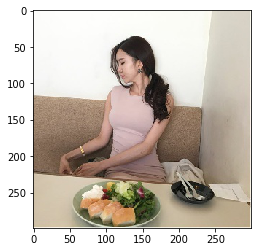

None


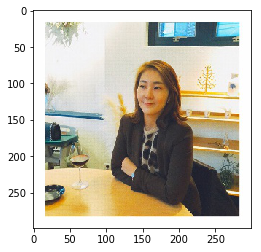

None


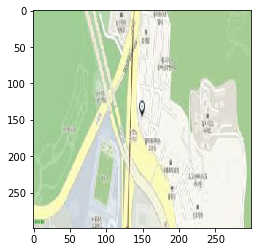

In [5]:
for image in os.listdir(imagepath):
    img = io.imread(imagepath+'/'+image)
    faces = detector(img)
    if not faces:
        print('None')
        plt.imshow(img)
        plt.show()
    else:
        for d in faces:
            print ("left,top,right,bottom:", d.left(), d.top(), d.right(), d.bottom())
            plt.imshow(img)
            img2=cv2.rectangle(img, (d.left(),d.top()) , (d.right(), d.bottom()), (255,0, 0), 2)
            plt.imshow(img2)
        plt.show()
        front_detected.append(image)


In [6]:
print(front_detected)

['99_1.jpg']


# cnn face detector

In [7]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('./mmod_human_face_detector.dat')

In [8]:
imagepath = "../YoonsKitchen//category_AI/8"

In [9]:
mmod_detected = [] # 얼굴이 제대로 감지된 사진들 이름 저장

None


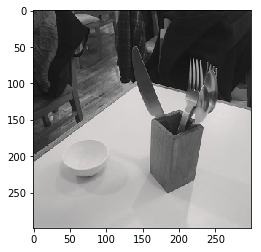

None


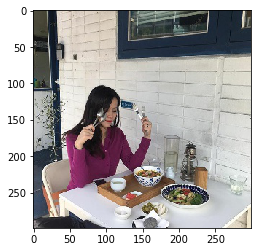

None


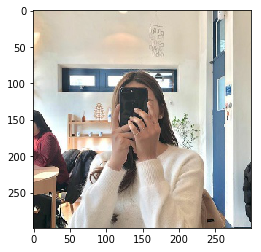

None


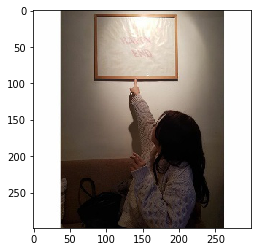

98_38.jpg: Number of faces detected: 1
Detection 1: Left: 147 Top: 38 Right: 216 Bottom: 107 Confidence: 0.8667021989822388


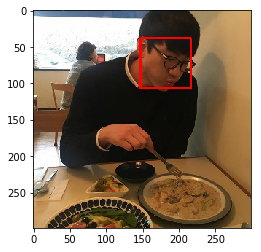

99_1.jpg: Number of faces detected: 2
Detection 1: Left: 215 Top: 73 Right: 272 Bottom: 130 Confidence: 1.0590732097625732
Detection 2: Left: 45 Top: 68 Right: 127 Bottom: 150 Confidence: 1.0390093326568604


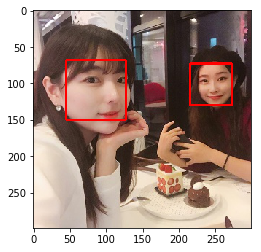

99_6.jpg: Number of faces detected: 1
Detection 1: Left: 109 Top: 57 Right: 148 Bottom: 97 Confidence: 1.0680614709854126


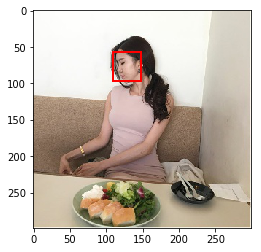

99_9.jpg: Number of faces detected: 1
Detection 1: Left: 135 Top: 87 Right: 183 Bottom: 135 Confidence: 1.0782201290130615


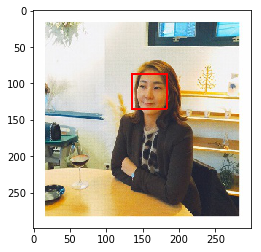

None


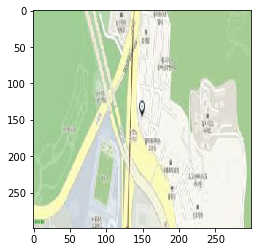

In [11]:
for image in os.listdir(imagepath):
    try:
        img = io.imread(imagepath+'/'+image)
        dets = cnn_face_detector(img,1)
        flag=False
        if(len(dets)>0):
            print(image+': Number of faces detected: {}'.format(len(dets)))    
            for j, d in enumerate(dets):
                if(d.confidence>=0.2): # 하나라도 confidence>=0.2 인 얼굴이 감지되면 저장하기
                    flag=True
                    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}"
                          .format(j+1, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
                    img2=cv2.rectangle(img, (d.rect.left(),d.rect.top()) , (d.rect.right(), d.rect.bottom()), (255,0, 0), 2)                    
            if(flag==True):
                mmod_detected.append(image)
                plt.figure(figsize=(6,4))
                plt.imshow(img)
                plt.imshow(img2)
                plt.show()
        else:
            print('None')
            plt.figure(figsize=(6,4))
            plt.imshow(img)
            plt.show()
            
            
    except:
        pass


In [12]:
print(mmod_detected)

['98_38.jpg', '99_1.jpg', '99_6.jpg', '99_9.jpg', '98_38.jpg', '99_1.jpg', '99_6.jpg', '99_9.jpg']
